# Classifiers

## Libraries

In [1]:
import matplotlib.pyplot as plt
from seaborn import pairplot
from seaborn import set as sns_set

from context import *
from util.classifiers import *
from util.dfmgmt import initSet, wrangle

## Plot characteristics and global variables

In [2]:
sns_set(style="whitegrid", font_scale=1)
%matplotlib inline

target = 'charted'  # main feature to be predicted
bestFeatures = ['density', 'unique_words', 'sentiment_polarity', 'explicit']

## Import dataset

In [3]:
df = initSet()

In [4]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9744,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9791,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


## Basic exploratory analysis

In [5]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1991.199795,1986.552254,61.288166,137.016137,93.791496,292.182889,65.571209,64.231301,21.847336,105.648822,15.445184,0.175461,1.178023,4.874880,0.447342,0.580943
std,13.556839,13.559383,35.331564,80.208321,45.511645,168.326983,44.005934,42.659356,17.708684,56.066287,13.698001,0.380410,4.894722,3.527072,0.751239,0.493468
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.427959,-0.999700,0.000000
25%,1981.000000,1980.000000,40.000000,84.000000,67.000000,181.000000,36.000000,34.000000,11.000000,72.000000,7.000000,0.000000,0.000000,2.975612,-0.025800,0.000000
50%,1994.000000,1990.000000,53.000000,118.000000,85.000000,256.000000,54.000000,57.000000,17.000000,93.000000,12.000000,0.000000,0.000000,4.161161,0.926000,1.000000
75%,2003.000000,2000.000000,70.000000,165.000000,108.000000,355.000000,81.000000,84.000000,28.000000,121.000000,19.000000,0.000000,0.000000,5.747534,0.988125,1.000000
max,2010.000000,2010.000000,307.000000,638.000000,388.000000,1415.000000,376.000000,346.000000,205.000000,481.000000,234.000000,1.000000,88.000000,84.237399,0.999900,1.000000


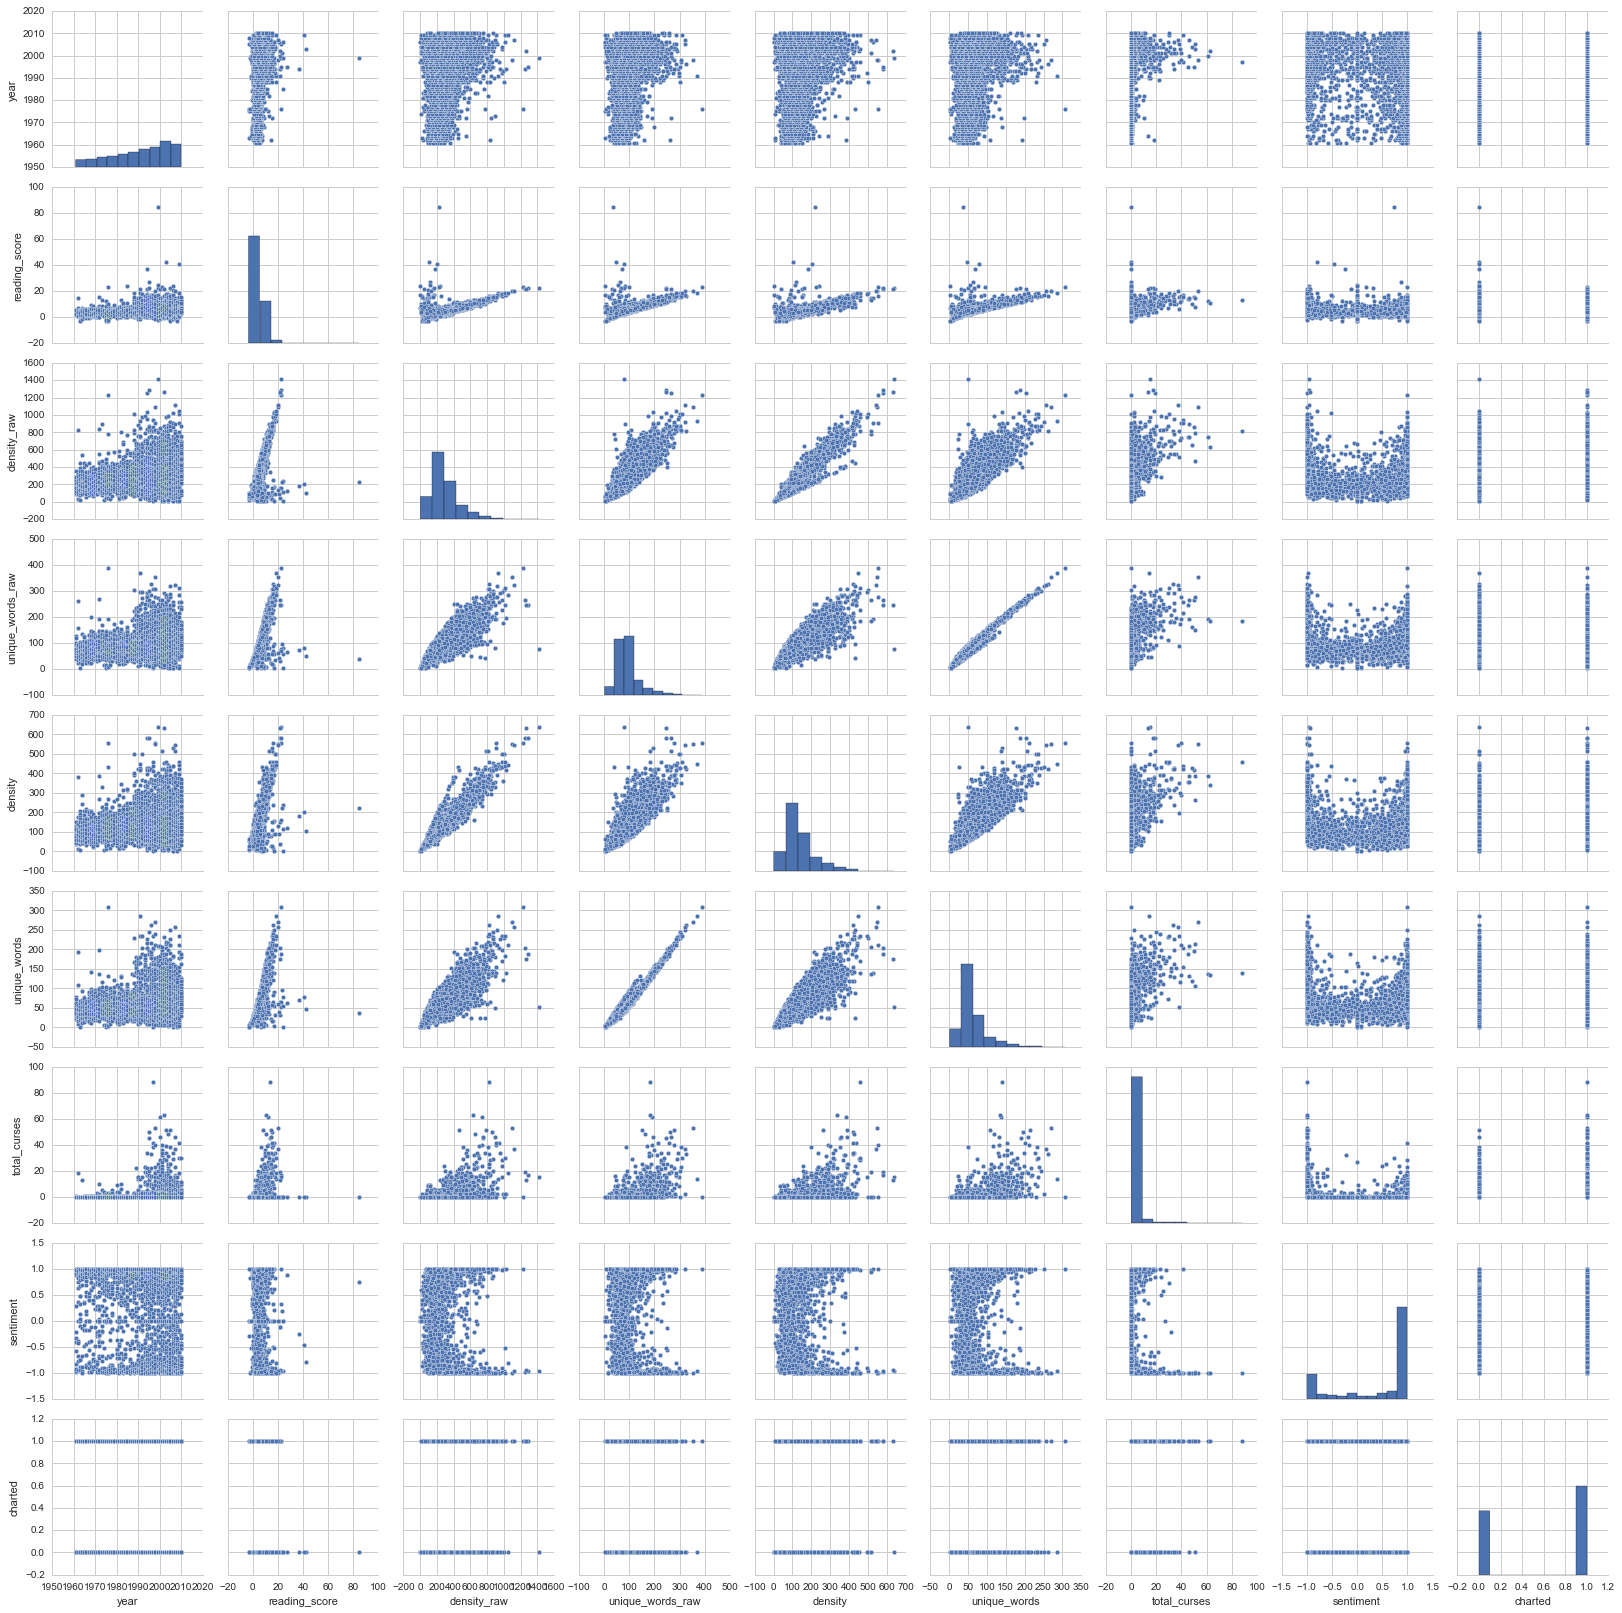

In [6]:
# Get pair plot for major features of the dataset
pairplot(df[bestFeatures])

## Try without time features

In [7]:
# Drop both year and decade
dropList = ['most_used_term']
removeList = ['decade', 'year', 'charted']

df, features = wrangle(df, dropList, removeList, True)

df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1


In [8]:
X = df[features]
y = df[target]

model = Classifiers(X, y)

In [9]:
model.initProc()

In [10]:
model.defaultParams()

Models with default parameters:

K Neighbors
Accuracy: 0.675
ROC AUC: 0.709

Decision Tree
Accuracy: 0.633
ROC AUC: 0.624

Random Forest
Accuracy: 0.694
ROC AUC: 0.751

Logistic Regression
Accuracy: 0.718
ROC AUC: 0.774



In [11]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 32}
Accuracy of current model: 0.675
Accuracy using best param: 0.699

Logistic Regression
Best Params: {'C': 1}
Accuracy of current model: 0.718
Accuracy using best param: 0.714

Random Forest
Best Params: {'n_estimators': 512}
Accuracy of current model: 0.694
Accuracy using best param: 0.713

Decision Tree
Best Params: {'max_depth': 4}
Accuracy of current model: 0.633
Accuracy using best param: 0.687



# Instantiate models

In [12]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


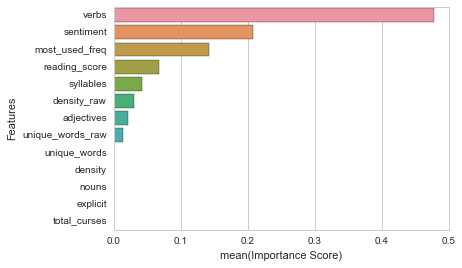

Random Forest


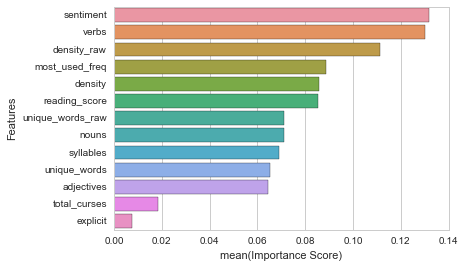

Logistic Regression doesn't have feature importance.



In [13]:
model.plotModels()

In [14]:
model.getBestParams('best_param_no_time.txt')

Best model is Logistic Regression with {'C': 1}


# Try with the time feature

In [15]:
df = initSet()

# Keep both year and decade
dropList = ['most_used_term']
removeList = ['charted', 'decade']

df, features = wrangle(df, dropList, removeList, True)

df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1


In [16]:
X = df[features]
y = df[target]

model = Classifiers(X, y)

In [17]:
model.initProc()

In [18]:
model.defaultParams()

Models with default parameters:

K Neighbors
Accuracy: 0.783
ROC AUC: 0.822

Decision Tree
Accuracy: 0.713
ROC AUC: 0.707

Random Forest
Accuracy: 0.797
ROC AUC: 0.841

Logistic Regression
Accuracy: 0.725
ROC AUC: 0.778



In [19]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 16}
Accuracy of current model: 0.783
Accuracy using best param: 0.789

Logistic Regression
Best Params: {'C': 512}
Accuracy of current model: 0.725
Accuracy using best param: 0.716

Random Forest
Best Params: {'n_estimators': 128}
Accuracy of current model: 0.797
Accuracy using best param: 0.816

Decision Tree
Best Params: {'max_depth': 4}
Accuracy of current model: 0.713
Accuracy using best param: 0.788



In [20]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


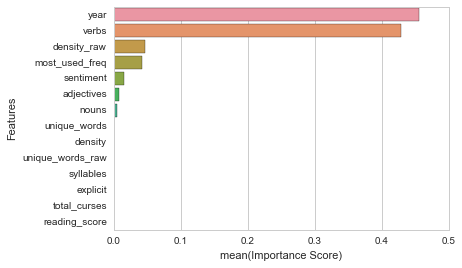

Random Forest


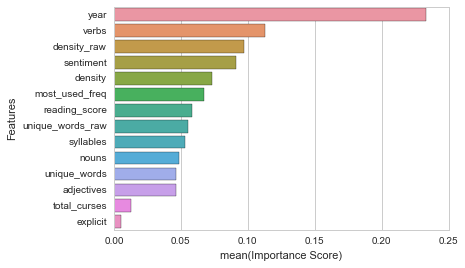

Logistic Regression doesn't have feature importance.



In [21]:
model.plotModels()

In [22]:
model.getBestParams('best_param_time.txt')

Best model is Random Forest with {'n_estimators': 128}


In [25]:
from util.polarize import *
df = initSet()

# Keep both year and decade
dropList = ['most_used_term']
removeList = ['charted', 'decade']

df = wrangle(df, dropList, removeList)
df['sentiment_polarity'] = df.apply(sentiment, axis=1)
df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted,sentiment_polarity
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0,1
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1,1


In [26]:
X = df[bestFeatures]
y = df[target]

model = Classifiers(X, y)

In [27]:
model.initProc()

In [28]:
model.defaultParams()

Models with default parameters:

K Neighbors
Accuracy: 0.627
ROC AUC: 0.639

Decision Tree
Accuracy: 0.592
ROC AUC: 0.587

Random Forest
Accuracy: 0.624
ROC AUC: 0.666

Logistic Regression
Accuracy: 0.678
ROC AUC: 0.713



In [29]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 64}
Accuracy of current model: 0.627
Accuracy using best param: 0.662

Logistic Regression
Best Params: {'C': 1}
Accuracy of current model: 0.678
Accuracy using best param: 0.686

Random Forest
Best Params: {'n_estimators': 512}
Accuracy of current model: 0.624
Accuracy using best param: 0.638

Decision Tree
Best Params: {'max_depth': 4}
Accuracy of current model: 0.592
Accuracy using best param: 0.675



In [30]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


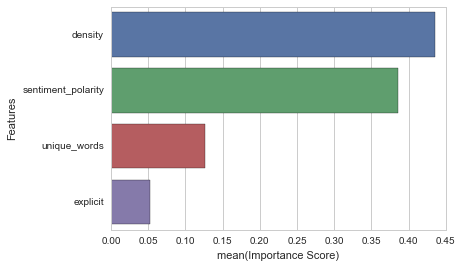

Random Forest


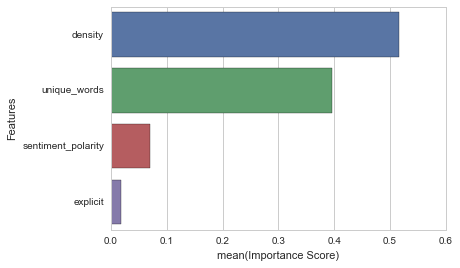

Logistic Regression doesn't have feature importance.



In [31]:
model.plotModels()

In [32]:
model.getBestParams('default_best_param.txt')

Best model is Logistic Regression with {'C': 1}
